In [63]:
from audiointerp.dataset.esc50 import ESC50dataset
from audiointerp.model.cnn14 import TransferCnn14
from audiointerp.fit import Trainer, plot_learning_curves
from audiointerp.processing.spectrogram import LogMelSTFTSpectrogram
import torchaudio
import torch.nn as nn
import torch.optim as optim
import torchaudio.transforms as T_audio
import torchvision.transforms as T_vision
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random
import numpy as np
from IPython.display import Audio

In [64]:
root_dir = "/root/ESC50"
sr = 32000
train_folds = [1, 2, 3]
valid_folds = [4]
test_folds = [5]

In [65]:
n_fft = 1024
hop_length = 320
win_length = 1024
n_mels = 64
f_min = 50
f_max = 14000
top_db = None

In [66]:
feature_extractor = LogMelSTFTSpectrogram(
    n_fft=n_fft, win_length=win_length, hop_length=hop_length,
    sample_rate=sr, n_mels=n_mels, f_min=f_min, f_max=f_max, top_db=top_db,
    return_phase=False, return_full_db=False
)

In [43]:
feature_augs = nn.Sequential(
    T_audio.FrequencyMasking(10),
    T_audio.TimeMasking(20)
)

In [60]:
train_data = ESC50dataset(root_dir=root_dir, sr=sr, folds=train_folds, normalize="peak", feature_extractor=feature_extractor, feature_augs=feature_augs)
valid_data = ESC50dataset(root_dir=root_dir, sr=sr, folds=valid_folds, normalize="peak", feature_extractor=feature_extractor)
test_data = ESC50dataset(root_dir=root_dir, sr=sr, folds=test_folds, normalize="peak", feature_extractor=feature_extractor)

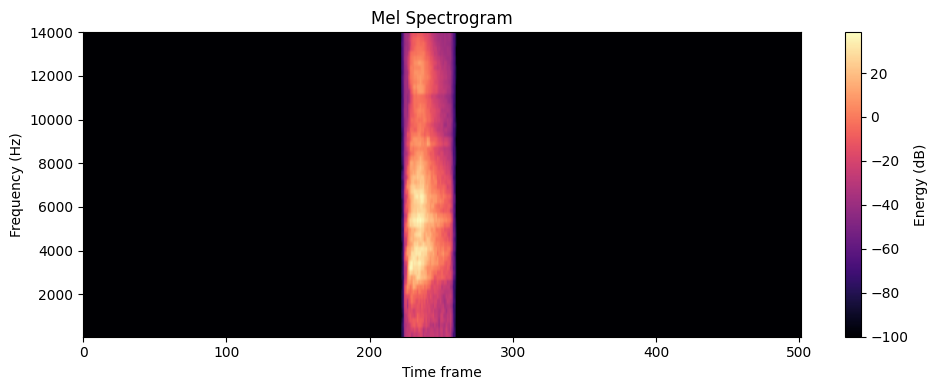

In [61]:
plot_spec(train_data[0][0], sample_rate=sr, fmin=f_min, fmax=f_max)

In [53]:
train_data_try = ESC50dataset(root_dir=root_dir, sr=sr, folds=train_folds, normalize="peak")

In [57]:
Audio(train_data_try[4][0], rate=sr)